# Read the data

In [1]:
import pandas as pd
A=pd.read_csv("C:/Users/LENOVO/Downloads/digitsnpixels.csv")

In [2]:
A.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
A.shape

(42000, 785)

# Visualize 1 image by converting  into 28*28

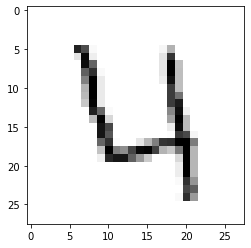

In [4]:
import matplotlib.pyplot as plt
X=A.drop("label",axis=1).values
plt.imshow(X[3:4].reshape(28,28),cmap=plt.cm.binary)

In [5]:
X[3:4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 220, 179,   6,   0,   0,   0,   0,   0,   0,   0,
          0,   9,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  28, 247,  17,   0

# Define X and Y in array format

# Convert Y into categorical data(OHE)

In [6]:
Y=A.label.values

In [7]:
Y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [8]:
Y_cat = pd.get_dummies(Y).values

In [9]:
Y_cat

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [10]:
import tensorflow as tf
tf.keras.utils.to_categorical(Y)


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Scale of X

In [11]:
X_scaled = X/255


In [12]:
 X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
Y_cat

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

# Train ND Test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y_cat,test_size=0.2,random_state=21)

In [15]:
xtrain.shape


(33600, 784)

In [16]:
xtest.shape


(8400, 784)

In [17]:
xtrain = xtrain.reshape(33600,28,28,1)
xtest = xtest.reshape(8400,28,28,1)

In [18]:
xtrain.shape


(33600, 28, 28, 1)

# Create A NN

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,BatchNormalization,Flatten


In [20]:
nn=Sequential()
nn.add(Convolution2D(filters = 16,kernel_size = (3,3),activation="relu",input_shape=(28, 28, 1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))
nn.add(Flatten())

nn.add(Dense(120,activation="relu"))
nn.add(Dense(10,activation="softmax"))


In [21]:
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [22]:
nn.fit(xtrain,ytrain,epochs=3,batch_size=64)


Epoch 1/3
525/525 [==============================] - 28s 50ms/step - loss: 0.1772 - accuracy: 0.9449
Epoch 2/3
525/525 [==============================] - 29s 54ms/step - loss: 0.0575 - accuracy: 0.9820
Epoch 3/3
525/525 [==============================] - 27s 52ms/step - loss: 0.0350 - accuracy: 0.9885


In [23]:
pred_prob = nn.predict(xtest)


In [34]:
pred_prob[1]

array([1.1236917e-11, 1.6503564e-07, 5.0144113e-08, 6.2754133e-08,
       9.9995244e-01, 2.3744978e-08, 4.2218890e-08, 1.1849630e-05,
       2.1577237e-07, 3.5072215e-05], dtype=float32)

In [26]:
from numpy import argmax
pred = argmax(pred_prob,axis=1)


In [27]:
pred

array([1, 4, 2, ..., 0, 1, 2], dtype=int64)

In [28]:
ytest = argmax(ytest,axis=1)


In [29]:
ytest

array([1, 4, 2, ..., 0, 1, 2], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.9817857142857143